In [29]:
from langgraph.graph import START, END, StateGraph
from typing import TypedDict

In [30]:
class BatsmanState(TypedDict):
    runs: int
    balls: int
    fours: int
    sixes: int

    strike_rate: float
    balls_per_boundary: float
    boundary_percent: float

    summary: str

In [31]:
def calculate_sr(state: BatsmanState):
    strike_rate = (state['runs'] / state['balls']) * 100

    return {"strike_rate": strike_rate}


def calculate_bpb(state: BatsmanState):
    """after how many balls batsman hits the boundary"""
    bpb = state['balls'] / \
        (state["fours"] + state['sixes'])

    return {"balls_per_boundary": bpb}


def calculate_bp(state: BatsmanState):
    bp = (
        ((state['fours']*4) + (state['sixes']*6)) / state['runs']) * 100

    return {"boundary_percent": bp}

In [32]:
def summary(state: BatsmanState):
    summary = f"""
    Strike rate - {state['strike_rate']}
    Balls per boundary - {state['balls_per_boundary']}
    Boundary Percentage - {state['boundary_percent']}
    """

    return {"summary": summary}

In [33]:
graph = StateGraph(BatsmanState)

graph.add_node("strike_rate", calculate_sr)
graph.add_node("balls_per_boundary", calculate_bpb)
graph.add_node("boundary_percentage", calculate_bp)
graph.add_node("summary", summary)

graph.add_edge(START, "strike_rate")
graph.add_edge(START, "balls_per_boundary")
graph.add_edge(START, "boundary_percentage")

graph.add_edge("strike_rate", "summary")
graph.add_edge("balls_per_boundary", "summary")
graph.add_edge("boundary_percentage", "summary")

graph.add_edge("summary", END)

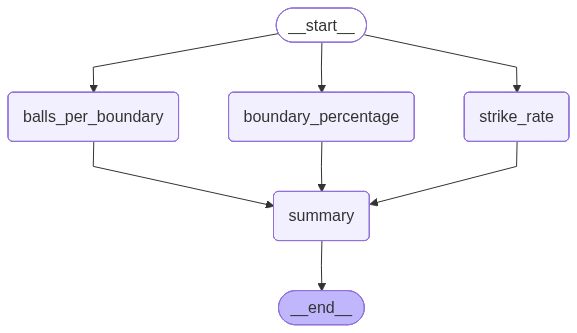

In [34]:
app = graph.compile()
app

In [35]:
response = app.invoke({
    "runs": 100,
    "balls": 25,
    "fours": 2,
    "sixes": 3
})

print(response["summary"])


    Strike rate - 400.0
    Balls per boundary - 5.0
    Boundary Percentage - 26.0
    
